In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline

tnr="Times New Roman"
tnrb="Times New Roman Bold"
plt.rcParams["mathtext.default"]='regular'

In [12]:
#manual inputs
Filename = "kappaZ_TEST_HEII1.txt"
abund='Martins et al. (2015) abundances'
obsID = ''
starname = '$\\zeta$ Pup'
save_filename = 'opacity_TEST.png' #current code only saves the main opacity vs wavelength plot

In [13]:
def read_kappaZ_file(filename):
    """
    Specialized function for reading .txt kappaZ files and outputting a
    list (described below).
    """
    datfile = open(filename, "r")
    line = datfile.readline().strip()
    
    #if/elif/else statement which checks if the kappaZ file has 2 or 3 columns(i.e. if the HEII switch was on or off)
    if len(line.split('\t'))==3:
        
        #skipping header
        while line[0] not in "0123456789":
            line = datfile.readline().strip() 
        """
        a list: 0   central wavelength in keV
                1   kappa in cm**2 g**-1
                2   HeII contribution to opacity
        """  
        data = [[],[],[]]
        while line != "": #until end of file, keep reading
        
            line = line.split("\t") #otherwise, split line into list of strings
            data[0].append(float(line[0])) #append float of energy to energy list
            data[1].append(float(line[1])) #append kappa
            data[2].append(float(line[2])) #append HEII column
            
            #grab the next line
            line = datfile.readline().strip()           
    elif len(line.split('\t'))==2:    
        while line[0] not in "0123456789":
            line = datfile.readline().strip()
            """
            a list: 0   central wavelength in keV
                    1   kappa in cm**2 g**-1
            """  
        data = [[],[]]
        while line != "": #until end of file, keep reading
        
            line = line.split("\t") #otherwise, split line into list of strings
            data[0].append(float(line[0])) #append float of energy to energy list
            data[1].append(float(line[1])) #append kappa
                
            #grab the next line
            line = datfile.readline().strip()
    else: print("incorrect file format")
             
    return data

In [14]:
#reading data
data = read_kappaZ_file(Filename)

#defining the elements of data in the case of 2 or 3 columns
if len(data)==3:
    keV = np.asarray(data[0]) #still in keV, we will convert to angstrom when we plot
    Kappa = np.asarray(data[1])
    HEII = np.asarray(data[2])
    Kap_HEII = Kappa+HEII
else:
    keV = np.asarray(data[0]) #still in keV, we will convert to angstrom when we plot
    Kappa = np.asarray(data[1])

In [15]:
#Making the main opacity plots function
def opacvslambda(dat):
    #if/else statement for when there is 2 or 3 columns
    if len(dat)==3:
        plt.rcParams['figure.figsize'] = (11.25, 6.0)
        plt.plot(12.398/keV, Kappa, label='without He II opacity') #12/398/keV converts to angstroms

        #plotting opacity+HEII column vs wavelength
        plt.plot(12.398/keV, Kap_HEII, label='with He II opacity') #12/398/keV converts to angstroms

        plt.xlim(4,30)
        ymin_ind = int(np.where(keV == 0.4313)[0]) #auto restricts the y-range to kappa's max value within the 4-30 angstrom bounds
        ymax_ind = int(np.where(keV == 3.2345)[0])
        plt.ylim(-10,Kap_HEII[ymin_ind:ymax_ind].max()+Kap_HEII[ymin_ind:ymax_ind].max()/4)

        plt.text(5, Kap_HEII[ymin_ind:ymax_ind].max()+Kappa[ymin_ind:ymax_ind].max()/4 - 70, abund,fontsize=18,fontname=tnr)
        plt.text(5, Kap_HEII[ymin_ind:ymax_ind].max()+Kappa[ymin_ind:ymax_ind].max()/4 - 30,'%s %s'%(starname,obsID),fontsize=18,fontname=tnr)
        plt.xlabel("Wavelength (Å)",fontsize=18,fontname=tnr)
        plt.ylabel("Opacity (cm$^{2}$ g$^{-1}$)",fontsize=18,fontname=tnr)
        plt.xticks(fontname=tnr)
        plt.yticks(fontname=tnr)
        plt.tick_params(labelsize=15)

        plt.legend()
        plt.savefig(save_filename)
        plt.show()

      
    else:        
        plt.rcParams['figure.figsize'] = (11.25, 6.0)
        plt.plot(12.398/keV, Kappa, label='no He II opacity') #12/398/keV converts to angstroms
        
        plt.xlim(4,30)
        ymin_ind = int(np.where(keV == 0.4313)[0]) #auto restricts the y-range to kappa's max value within the 4-30 angstrom bounds
        ymax_ind = int(np.where(keV == 3.2345)[0])
        plt.ylim(-10,Kappa[ymin_ind:ymax_ind].max()+Kappa[ymin_ind:ymax_ind].max()/4)
        
        plt.text(5, Kappa[ymin_ind:ymax_ind].max()+Kappa[ymin_ind:ymax_ind].max()/4 - 70, abund,fontsize=18,fontname=tnr)
        plt.text(5, Kappa[ymin_ind:ymax_ind].max()+Kappa[ymin_ind:ymax_ind].max()/4 - 30,'%s %s'%(starname,obsID),fontsize=18,fontname=tnr)
        plt.xlabel("Wavelength (Å)",fontsize=18,fontname=tnr)
        plt.ylabel("Opacity (cm$^{2}$ g$^{-1}$)",fontsize=18,fontname=tnr)
        plt.xticks(fontname=tnr)
        plt.yticks(fontname=tnr)
        plt.tick_params(labelsize=15)

        plt.legend()
        plt.savefig(save_filename)
        plt.show()    

In [16]:
#defining function for opacity vs energy
def opacvsenergy(dat):
    #don't need an if/else statement because we only use the first two columns regardless
    #the HEII column is enormous at very low energies, and completely overshadows the opacity
    plt.rcParams['figure.figsize'] = (22.5, 8.0)
    plt.rcParams['font.family'] = tnr 
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('%s\n%s %s' %(abund,starname,obsID),fontname=tnr,fontsize=26)
    #linear scale
    ax1.plot(keV, Kappa)
    ax1.vlines(0.4313,0,max(Kappa)+0.03,linestyle='dashed',color='pink')
    ax1.vlines(3.2345,0,max(Kappa)+0.03,linestyle='dashed',color='pink')

    ax1.set_xlabel("Energy (keV)",fontsize=22,fontname=tnr)
    ax1.set_ylabel("Opacity (cm$^{2}$ g$^{-1}$)",fontsize=22,fontname=tnr)
    ax1.tick_params(axis='both',which='both',labelsize=18)
    #log-log scale
    ax2.plot(keV, Kappa)
    ax2.vlines(0.4313,0,max(Kappa)+0.03,linestyle='dashed',color='pink')
    ax2.vlines(3.2345,0,max(Kappa)+0.03,linestyle='dashed',color='pink')
    
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    
    ax2.set_xlabel("log(Energy (keV))",fontsize=22,fontname=tnr)
    ax2.set_ylabel("log(Opacity (cm$^{2}$ g$^{-1}$))",fontsize=22,fontname=tnr)
    ax2.tick_params(axis='both',which='both',labelsize=18)
    
    plt.show()
    

In [17]:
#defining function for plotting HEII column
def HEIIvsenergy(dat):
    #if/else statement for if the data has 2 or 3 columns
    if len(dat)==3:
        plt.rcParams['figure.figsize'] = (22.5, 8.0)
        plt.rcParams['font.family'] = tnr 
        fig, (ax1, ax2) = plt.subplots(1,2)
        fig.suptitle('%s\n%s %s' %(abund,starname,obsID),fontname=tnr,fontsize=26)
        
        #linear plot
        ax1.plot(keV, HEII)
        
        ax1.set_xlabel("Energy (keV)",fontsize=22,fontname=tnr)
        ax1.set_ylabel("HEII",fontsize=22,fontname=tnr)
        ax1.tick_params(axis='both',which='both',labelsize=18)
        
        #log-log plot
        ax2.plot(keV, HEII)
        
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        
        ax2.set_xlabel("Energy (keV)",fontsize=22,fontname=tnr)
        ax2.set_ylabel("HEII",fontsize=22,fontname=tnr)
        ax2.tick_params(axis='both',which='both',labelsize=18)
        plt.show()
    else: print('no HEII column found')

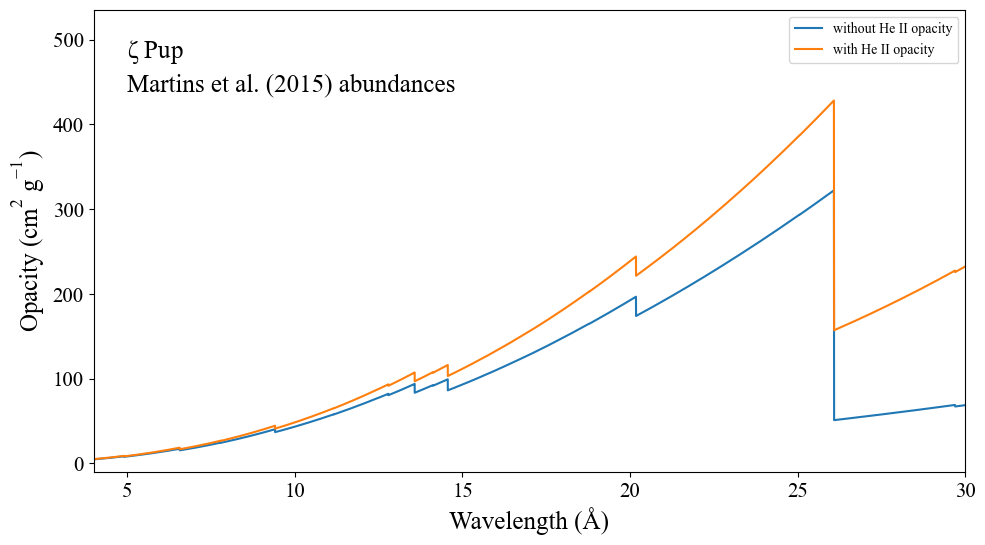

In [18]:
opacvslambda(data)

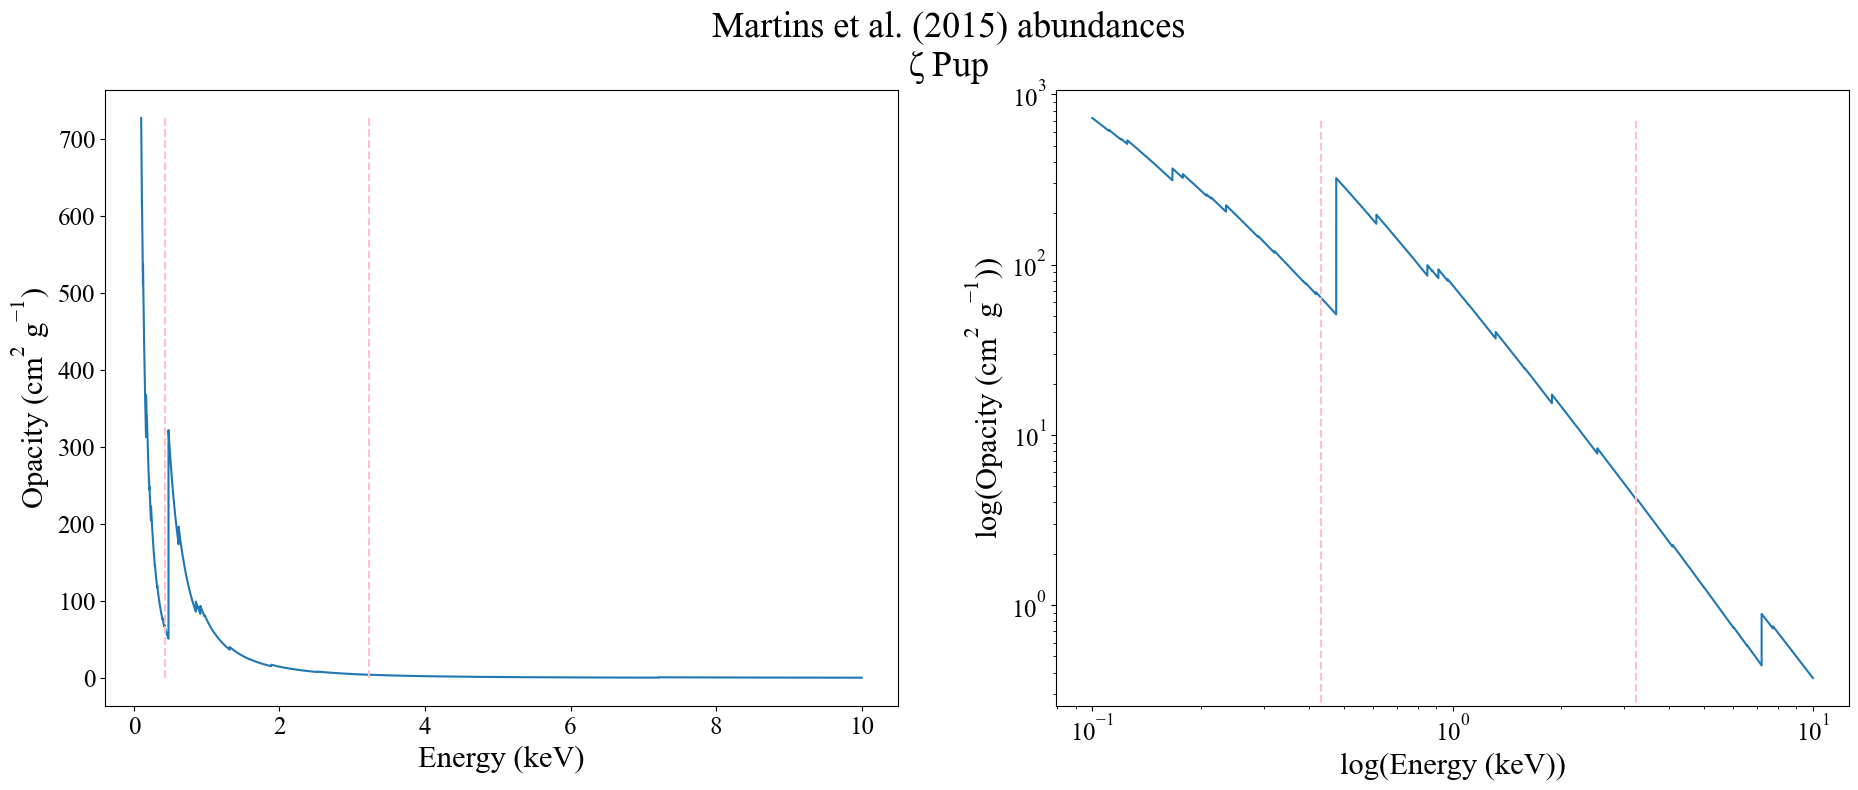

In [19]:
opacvsenergy(data)

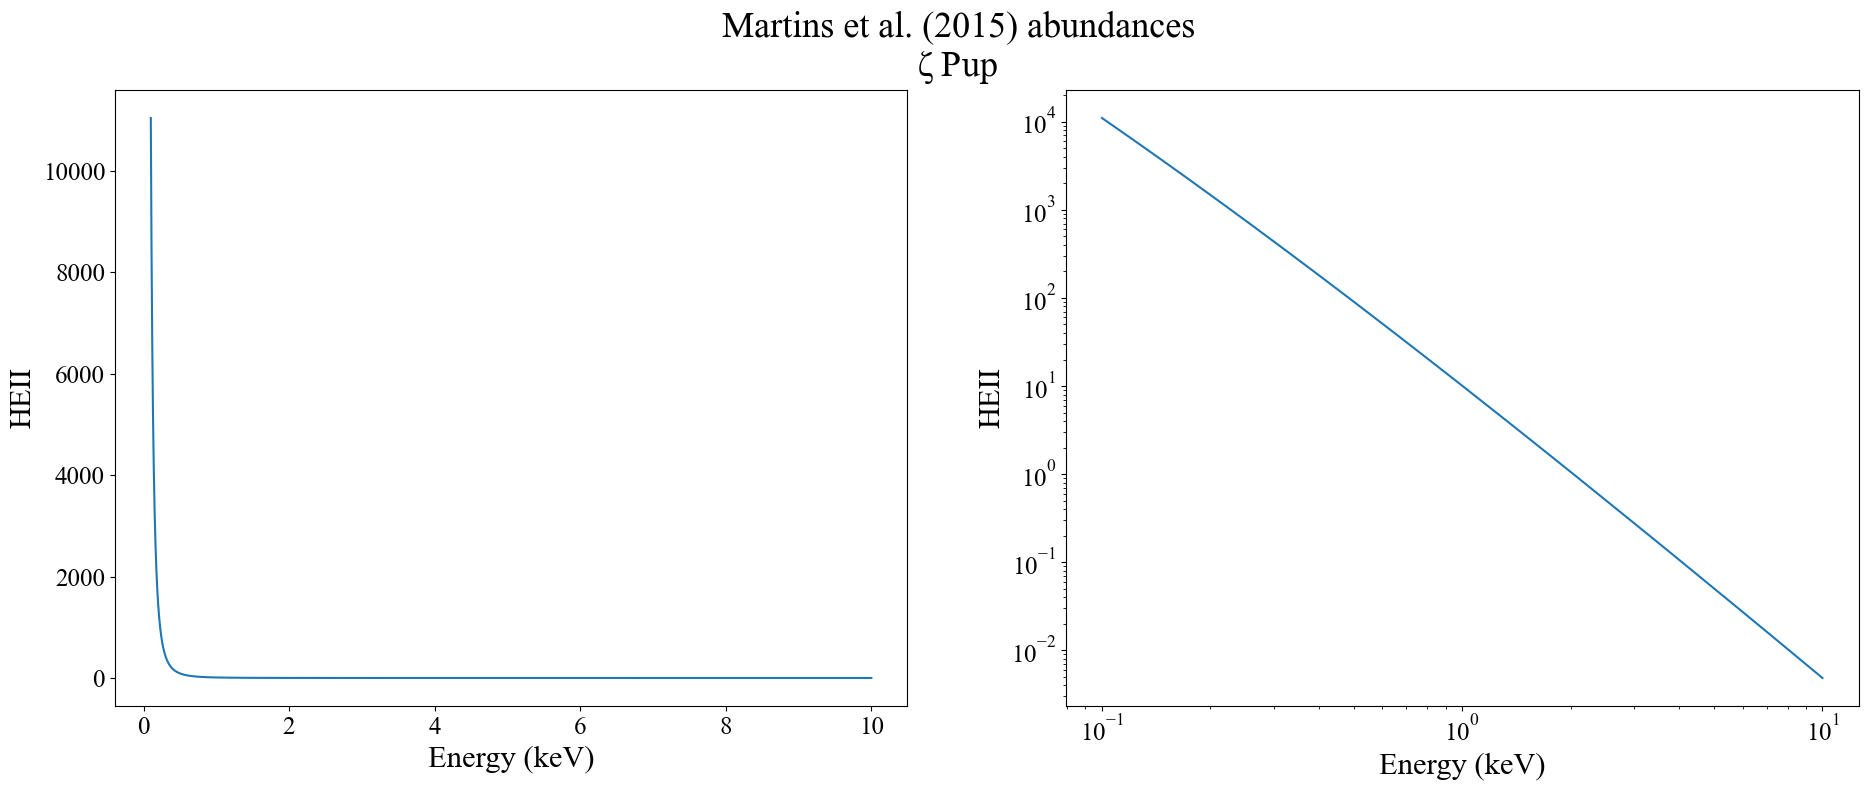

In [20]:
HEIIvsenergy(data)